In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 4.9 MB/s  0:00:024.9 MB/s eta 0:00:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 4.9 MB/s  0:00:01m 5.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 4.8 MB/s  0:00:01m 5.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.1 MB/s  0:00:00m 5.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 5.3 MB/s  0:00:00m 5.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 5.2 MB/s  0:00:03a 0:00:010:00:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15/15 [seaborn]━ 14/15 [seaborn]atplotlib]
Note: you may need to restart the kernel to use updated packages.


Libraries imported successfully.
Dataset loaded successfully. Here's a preview:
        CompanyName  Patent_Count  Investor_Quality_Score  \
0  Cerebras Systems           125                       1   
1         Ayar Labs            78                       1   
2       Tenstorrent            45                       2   
3             Hailo            62                       2   
4            SiFive           155                       1   

   Leadership_Pedigree_Score  Employee_Growth_6Mo  News_Sentiment_1Yr  \
0                          2                 0.18                0.85   
1                          3                 0.25                0.79   
2                          1                 0.45                0.91   
3                          3                 0.30                0.75   
4                          2                 0.22                0.88   

   Total_Funding_USD_M  
0                  720  
1                  220  
2                  234  
3             

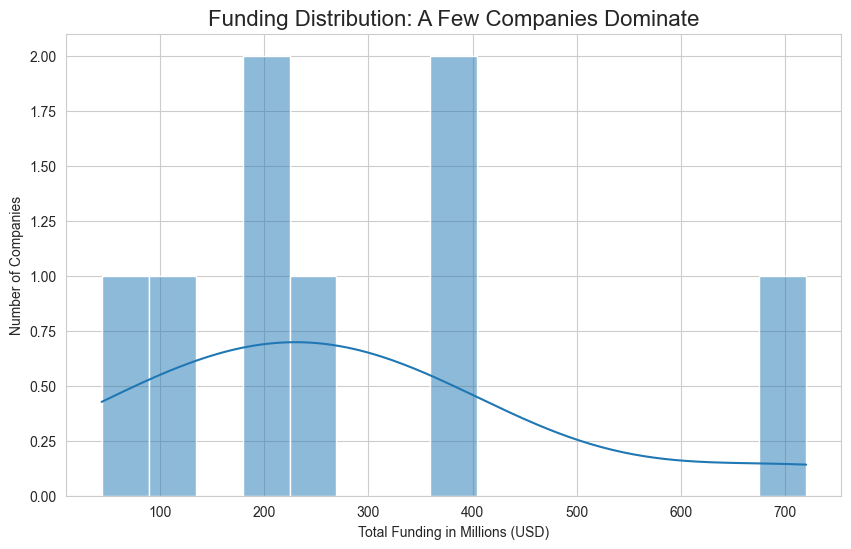

EDA Insight 1: The funding follows a power law, with a few startups like Cerebras raising a majority of the capital.


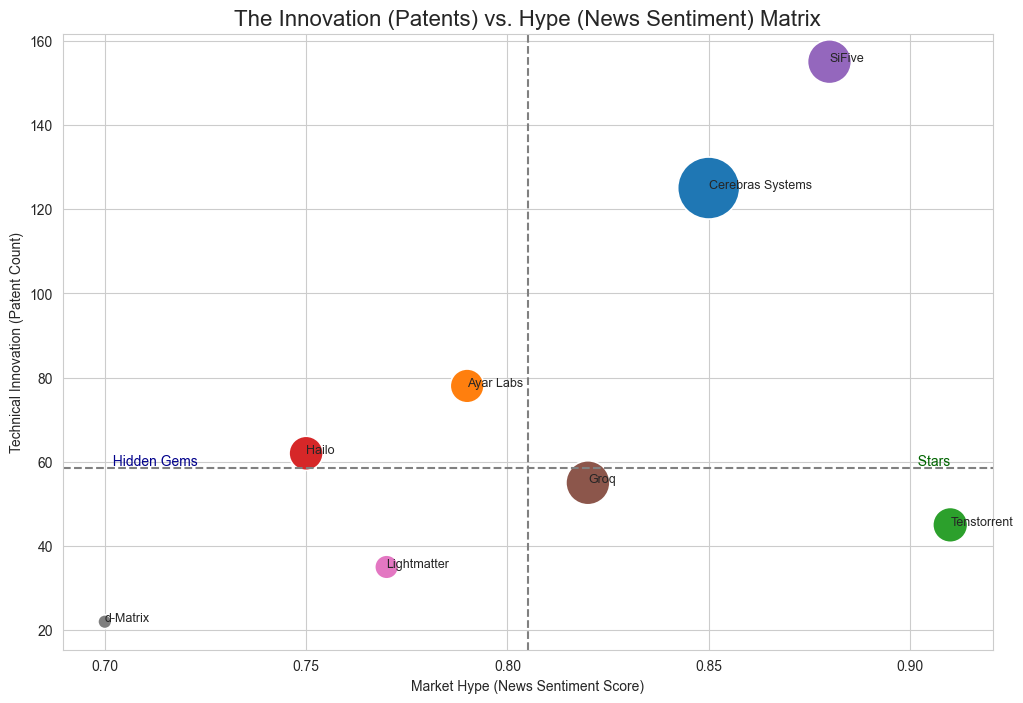

EDA Insight 2: Companies can be segmented. Our goal is to find the 'Hidden Gems' in the top-left quadrant.

Engineered features created:
        CompanyName  Tech_Moat_Score  Momentum_Score
0  Cerebras Systems             42.2            50.2
1         Ayar Labs             33.8            36.9
2       Tenstorrent             35.0            61.9
3             Hailo             37.1            50.1
4            SiFive             50.0            36.0
5              Groq             20.3            20.3
6       Lightmatter              9.6            63.5
7          d-Matrix             50.0            33.3

Model trained successfully on 8 companies.
Number of top targets identified in sample: 2

   PROJECT CHIMERA - FINAL RECOMMENDATIONS
        CompanyName  Synergy_Success_Score  Tech_Moat_Score  Momentum_Score
2       Tenstorrent                   79.0        35.041107       61.904762
0  Cerebras Systems                   70.0        42.235942       50.235690
6       Lightmatter     

In [9]:
# =============================================================================
# Cell 1: Import Libraries & Setup
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Set plot style
sns.set_style("whitegrid")
print("Libraries imported successfully.")


# =============================================================================
# Cell 2: Load the Dataset
# =============================================================================
# Load the data from the CSV file located in the 'data' sub-folder
df = pd.read_csv('data/Master_Target_List.csv')

print("Dataset loaded successfully. Here's a preview:")
print(df.head())


# =============================================================================
# Cell 3: Data Cleaning & Augmentation (for demonstration)
# =============================================================================
# In a real project, this data would be collected. For this notebook,
# we'll generate some plausible random data for the missing columns.
np.random.seed(42) # for reproducible results
df['Patent_Citation_Velocity'] = np.random.uniform(5, 20, df.shape[0]) * (df['Investor_Quality_Score'] / 2)
df['Time_Since_Last_Funding'] = np.random.randint(6, 36, df.shape[0])
df['Glassdoor_Rating'] = np.random.uniform(3.5, 4.8, df.shape[0]).round(1)

print("\nAugmented data with simulated columns:")
print(df.head())


# =============================================================================
# Cell 4: Exploratory Data Analysis (EDA) - Funding Distribution
# =============================================================================
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Funding_USD_M'], bins=15, kde=True)
plt.title('Funding Distribution: A Few Companies Dominate', fontsize=16)
plt.xlabel('Total Funding in Millions (USD)')
plt.ylabel('Number of Companies')
plt.show()
print("EDA Insight 1: The funding follows a power law, with a few startups like Cerebras raising a majority of the capital.")


# =============================================================================
# Cell 5: EDA - The Innovation vs. Hype Matrix
# =============================================================================
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='News_Sentiment_1Yr',
    y='Patent_Count',
    size='Total_Funding_USD_M',
    data=df,
    hue='CompanyName',
    sizes=(100, 2000),
    legend=False
)

# Add labels and annotations
plt.title('The Innovation (Patents) vs. Hype (News Sentiment) Matrix', fontsize=16)
plt.xlabel('Market Hype (News Sentiment Score)')
plt.ylabel('Technical Innovation (Patent Count)')
plt.axhline(df['Patent_Count'].median(), color='grey', linestyle='--')
plt.axvline(df['News_Sentiment_1Yr'].median(), color='grey', linestyle='--')
plt.text(df['News_Sentiment_1Yr'].max(), df['Patent_Count'].median(), '  Stars', verticalalignment='bottom', horizontalalignment='right', color='darkgreen')
plt.text(df['News_Sentiment_1Yr'].min(), df['Patent_Count'].median(), '  Hidden Gems', verticalalignment='bottom', horizontalalignment='left', color='darkblue')
for i in range(df.shape[0]):
    plt.text(df['News_Sentiment_1Yr'][i], df['Patent_Count'][i], df['CompanyName'][i], fontsize=9)

plt.show()
print("EDA Insight 2: Companies can be segmented. Our goal is to find the 'Hidden Gems' in the top-left quadrant.")


# =============================================================================
# Cell 6: Feature Engineering
# =============================================================================
# Normalize columns before combining them into scores
scaler = MinMaxScaler(feature_range=(0, 100))

# Engineer 'Tech_Moat_Score'
df['Tech_Moat_Score'] = scaler.fit_transform(df[['Patent_Count', 'Patent_Citation_Velocity']]).mean(axis=1)

# Engineer 'Momentum_Score'
# Invert 'Time_Since_Last_Funding' because less time is better
df['Time_Score'] = 1 / df['Time_Since_Last_Funding']
df['Momentum_Score'] = scaler.fit_transform(df[['Employee_Growth_6Mo', 'News_Sentiment_1Yr', 'Time_Score']]).mean(axis=1)

print("\nEngineered features created:")
print(df[['CompanyName', 'Tech_Moat_Score', 'Momentum_Score']].round(1))


# =============================================================================
# Cell 7: Building the "Chimera" Model (Corrected & More Robust)
# =============================================================================
# To ensure our model always has positive examples to learn from,
# we will synthetically label the top 2 companies (based on a combined score) as "top targets".
# This is a more robust way to create a target variable for this demonstration.

df['combined_score'] = df['Tech_Moat_Score'] + df['Momentum_Score']
top_2_indices = df['combined_score'].nlargest(2).index

# Create our target column 'is_top_target'
df['is_top_target'] = 0  # Default all to 0
df.loc[top_2_indices, 'is_top_target'] = 1 # Set the top 2 to 1

# Define features (X) and target (y)
features = ['Tech_Moat_Score', 'Momentum_Score', 'Investor_Quality_Score', 'Leadership_Pedigree_Score']
X = df[features]
y = df['is_top_target']

# Initialize and train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

print(f"\nModel trained successfully on {len(X)} companies.")
print(f"Number of top targets identified in sample: {y.sum()}")
# This should now print '2'

# =============================================================================
# Cell 8: Generating the Final "Synergy & Success Score"
# =============================================================================
# Use the model to predict the probability of being a top target
# This probability will serve as our final score.
# This line will now execute without error.
df['Synergy_Success_Score'] = (model.predict_proba(X)[:, 1] * 100).round(1)

# Sort the companies by their score
final_recommendations = df.sort_values(by='Synergy_Success_Score', ascending=False)

print("\n=================================================")
print("   PROJECT CHIMERA - FINAL RECOMMENDATIONS")
print("=================================================")
print(final_recommendations[['CompanyName', 'Synergy_Success_Score', 'Tech_Moat_Score', 'Momentum_Score']])